# <div style="text-align: center;">Skills Optimization Through Data Visualization</div>


Welcome to the visualizations notebook! Here, we'll use data visualization techniques to help optimize your resume.

What can you gain from this notebook? The idea is that you manage to check on the skills trends in job postings to help you gain career-advancing insights. We'll start with a word cloud to showcase frequently mentioned concepts. Then we'll move to a histogram showing keyword frequencies in all job listings. Finally, a heatmap will reveal the distinctive importance of specific keywords within job postings.

By the end, hopefully, you’ll have actionable insights into how your experience could align with current hiring trends. This could involve optimizing your resume, enhancing interview skills, or pursuing professional development based on our insights into current job market trends.

LET'S get started on our visualization journey and see what opportunities it reveals! 

### Setting Up the Environment

Before diving into the specific visualizations, some initial setup is required. We'll now load the necessary Python libraries, import the data from data_preparation.py file, and define utility functions like adjusting color palettes. This preprocessing stage ensures the data and components are ready for interactive analysis.

In [1]:
# Import preparation modules
from data_preparation import DataLoader, TextProcessing, SkillDataProcessor



# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

import numpy as np

from matplotlib.colors import LinearSegmentedColormap

from matplotlib.colors import to_rgba

from data_preparation import calculate_tfidf_scores
import nltk

from nltk.tokenize import word_tokenize



nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Read the json file and print its output  from the DataLoader class inside data_preparation file

In [2]:
# JSON file path
file_path = r"data/silver/head_of_product/skills_json_from_df_head_of_product_v4.json"

# Load data from the JSON file using the class DataLoader from data_preparation.py
prep = DataLoader(file_path)
original_df = prep.load_data()
original_df.head()

,index,job_description,job_title,skills
0,0,About the job\n \n \nAbout RevolutP...,Head of Product (Crypto Exchange),{'skills': [{'name': 'Crypto Exchange Product ...
1,1,About the job\n \n \nASI Reisen ist...,Head of Product (w/m/d),"{'skills': [{'name': 'Team management', 'refer..."
2,2,About the job\n \n \nDepartment: Pr...,Head of Product - Voluum,"{'skills': [{'name': 'Product Strategy', 'refe..."
3,3,About the job\n \n \nDescriptionAbo...,Senior Product Owner,{'skills': [{'name': 'Live Casino product deve...
4,4,About the job\n \n \nProyecto ambic...,CPO-B2C- Remoto 100%,{'skills': [{'name': 'Product analysis and imp...


Check the format and text of the skills column

In [3]:
# Set pandas display options
pd.set_option("display.max_colwidth", 140)


original_df["skills"].head(10)

0    {'skills': [{'name': 'Crypto Exchange Product Management', 'reference_text': 'Completely owning and building our Crypto Exchange product...
1    {'skills': [{'name': 'Team management', 'reference_text': 'Du führst das Tech Team bestehend aus ERP/Web Development, UX & Product Owner...
2    {'skills': [{'name': 'Product Strategy', 'reference_text': 'develop and articulate a clear and compelling product vision and strategy fo...
3    {'skills': [{'name': 'Live Casino product development', 'reference_text': 'Produce successful Live Casino products for mobile, tablet an...
4    {'skills': [{'name': 'Product analysis and improvement', 'reference_text': 'Analisiis y mejora del producto con un claro foco en el cons...
5    {'skills': [{'name': 'Product Management', 'reference_text': 'Define and drive the product strategy in close partnership with the founde...
6    {'skills': [{'name': 'game design', 'reference_text': 'Lead a team of game designers (math, audio, art, producers) to develop

Create new columns from the skills column to better analyze the content

In [4]:
# Initialize SkillDataProcessor instance and apply transformations
processor = TextProcessing(original_df)
df = processor.prepare_columns(original_df)  # Adding new columns from the skills column
df.head(3)

,index,job_description,job_title,skills,num_phrases,skills_text,num_words,unique_words,num_uniques
0,0,"About the job\n \n \nAbout RevolutPeople deserve more from their money. More visibility, more control, more freedom. And sinc...",Head of Product (Crypto Exchange),"[crypto exchange product management, team leadership, crypto product development, ux design, engineering collaboration, stakeholder coll...",6,crypto exchange product management team leadership crypto product development ux design engineering collaboration stakeholder collaboration,15,collaboration crypto design team engineering product development exchange stakeholder leadership management ux,12
1,1,About the job\n \n \nASI Reisen ist eine der führenden Reiseplattformen für nachhaltige Aktiv- & Erlebnisreisen weltweit. Sei...,Head of Product (w/m/d),"[team management, team development, process improvement, communication, monitoring, e-commerce, leadership, agile methodologies, technic...",13,team management team development process improvement communication monitoring e-commerce leadership agile methodologies technical knowle...,22,knowledge decision data-driven technical methodologies e-commerce monitoring team making agile communication development optimization pr...,18
2,2,"About the job\n \n \nDepartment: ProductEmployment Type: Full TimeLocation: Kraków, PolandReporting To: Paweł KrajewskiCompe...",Head of Product - Voluum,"[product strategy, team leadership, execution, market research, customer focus, cross-functional collaboration, product analytics, strat...",13,product strategy team leadership execution market research customer focus cross-functional collaboration product analytics strategic thi...,28,in strategy doing customer cross-functional communication customer-centric excellent thinker what advertising technology leadership coll...,25


In [5]:
# Create an instance of SkillDataProcessor
processor = SkillDataProcessor(df)

# Apply transformations
df["unique_words"] = processor.filter_stops(df["unique_words"])  # Remove stop words
df["unique_words"] = processor.lemmatize_words(df["unique_words"])  # Lemmatize
df["unique_words"] = processor.normalize_and_encode_ascii(
    df["unique_words"]
)  # Normalize and encode ASCII

# Print the new DataFrame after transformations
df.head(3)

,index,job_description,job_title,skills,num_phrases,skills_text,num_words,unique_words,num_uniques
0,0,"About the job\n \n \nAbout RevolutPeople deserve more from their money. More visibility, more control, more freedom. And sinc...",Head of Product (Crypto Exchange),"[crypto exchange product management, team leadership, crypto product development, ux design, engineering collaboration, stakeholder coll...",6,crypto exchange product management team leadership crypto product development ux design engineering collaboration stakeholder collaboration,15,collaboration crypto design team engineering product development exchange stakeholder leadership management ux,12
1,1,About the job\n \n \nASI Reisen ist eine der führenden Reiseplattformen für nachhaltige Aktiv- & Erlebnisreisen weltweit. Sei...,Head of Product (w/m/d),"[team management, team development, process improvement, communication, monitoring, e-commerce, leadership, agile methodologies, technic...",13,team management team development process improvement communication monitoring e-commerce leadership agile methodologies technical knowle...,22,knowledge decision data-driven technical methodology e-commerce monitoring team making agile communication development optimization proc...,18
2,2,"About the job\n \n \nDepartment: ProductEmployment Type: Full TimeLocation: Kraków, PolandReporting To: Paweł KrajewskiCompe...",Head of Product - Voluum,"[product strategy, team leadership, execution, market research, customer focus, cross-functional collaboration, product analytics, strat...",13,product strategy team leadership execution market research customer focus cross-functional collaboration product analytics strategic thi...,28,strategy customer cross-functional communication customer-centric excellent thinker advertising technology leadership collaboration anal...,25


In [6]:
# Create a function to adjust colors
def adjust_colors(base_color, n_colors, darkness_factor, brightness_factor):
    # Generate base colors
    base_colors = sns.color_palette(base_color, n_colors=n_colors)

    # Adjust each color individually
    adjusted_colors = (
        np.array(base_colors)
        * np.array(darkness_factor)[:, np.newaxis]
        * np.array(brightness_factor)[:, np.newaxis]
    )
    adjusted_colors = np.clip(adjusted_colors, 0, 1)

    # Create custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", adjusted_colors)

    return custom_cmap

## Discovering Job Posting Trends from a Word Cloud
In this visualization, we'll explore terms commonly used in job postings. The sizes of the words provide insight into which ones play a central role.

Take a close look at how the word sizes differ across the graphic. Larger terms may give us a quick read on themes and qualifications commonly emphasized by employers.

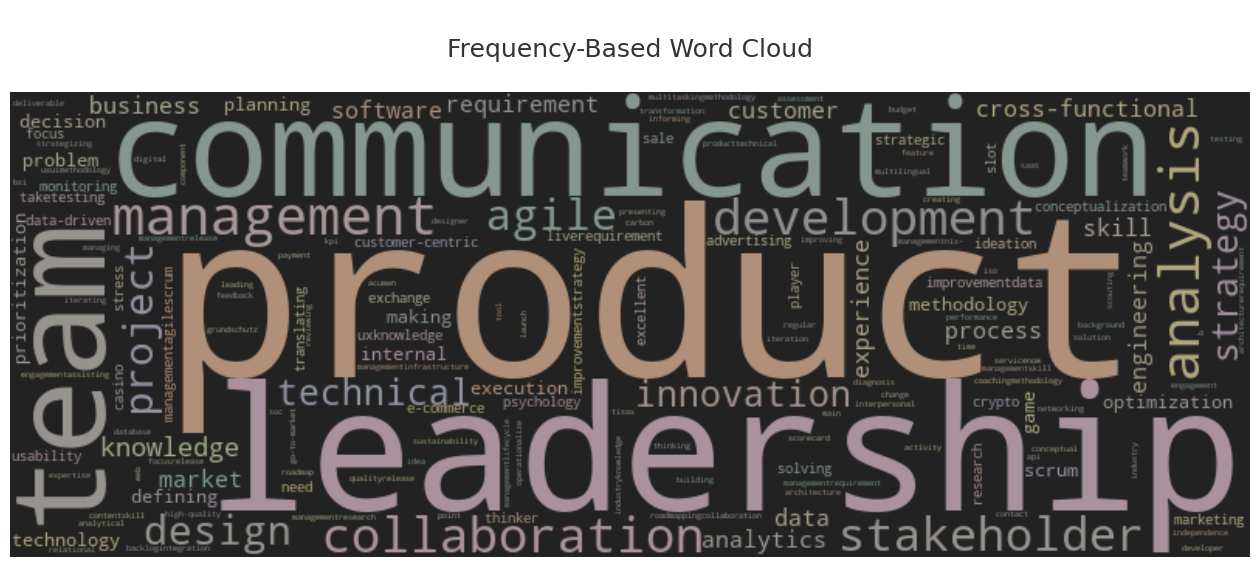

In [7]:
# Using 'unique_words' column from the dataframe
all_words_str = df["unique_words"].sum()
# Tokenize the string into words
all_words = word_tokenize(all_words_str)

# Get the frequency of each word across all rows
word_frequencies = {}
for word in all_words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

# Convert dictionary to list of (word, count) tuples
word_counts = list(word_frequencies.items())

# Sort by count in descending order
sorted_frequencies = sorted(word_counts, key=lambda x: x[1], reverse=True)

# Create a dictionary with words and their frequencies
wordcloud_data = {word: count for word, count in sorted_frequencies}

wordcloud_cmap = adjust_colors(
    base_color="Pastel2",
    n_colors=len(wordcloud_data),
    darkness_factor=[0.7] * len(wordcloud_data),
    brightness_factor=[1.0] * len(wordcloud_data),
)

# Generate word cloud using frequencies in wordcloud_data
wordcloud_dark = WordCloud(
    width=800,
    height=300,
    colormap=wordcloud_cmap,
    stopwords=STOPWORDS,
    background_color="#222222",
).generate_from_frequencies(wordcloud_data)

# Plot the WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_dark, interpolation="bilinear")
plt.title("\nFrequency-Based Word Cloud\n", size=18, color="#333333")
plt.axis("off")
plt.gcf().patch.set_facecolor("white")

plt.show()

### Understanding the Word Cloud

- **Word Size:** The size of each word in the cloud reflects its frequency, with larger words indicating higher usage within the job posting descriptions.

Use this dynamic representation to quickly identify the most prevalent skills. The word cloud reveals in-demand themes and provides a high-level view of skills employers prioritize.

## Analyzing Workplace Skills with a Frequency Histogram
In this next section, we'll take a closer look at frequently used terms from job listings using a frequency histogram. This visualization provides valuable insights into common skills employers prioritize.

Analyze the bars and frequency counts to uncover which qualifications stand out. Learning which words are emphasized can help refine your resume to highlight in-demand abilities.

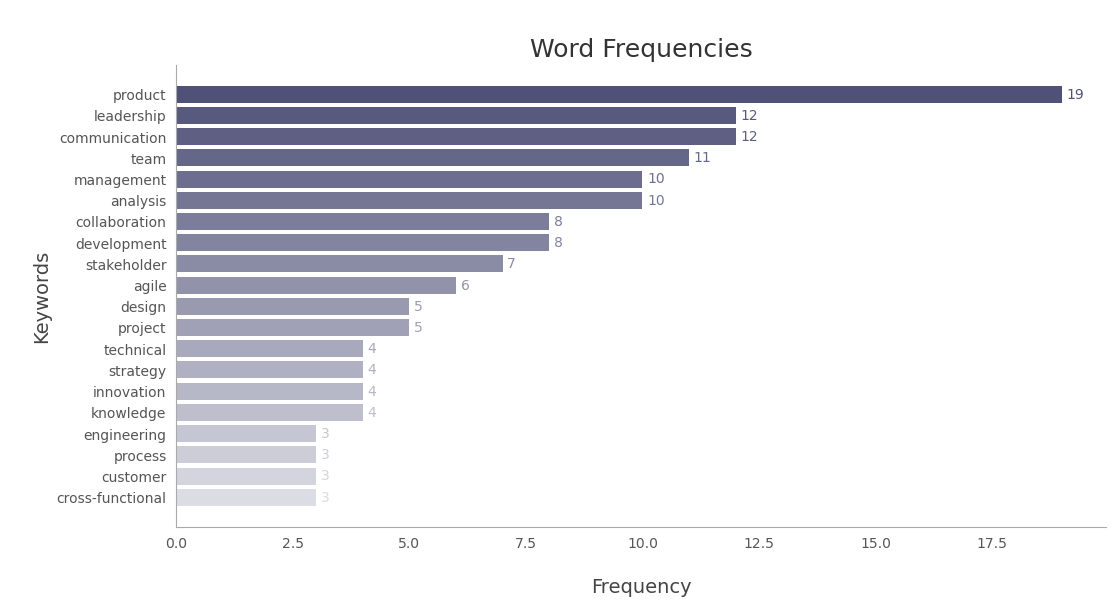

In [8]:
# Choose a color to use as the base
base_color = "#4f5178"

# Get the top N words directly from the sorted frequencies (with reversed order)
top_n = 20
top_words_list = [word for word, _ in sorted_frequencies[:top_n][::-1]]
top_frequencies = [count for _, count in sorted_frequencies[:top_n][::-1]]

# Normalize frequencies to use as darkness factors
norm = plt.Normalize(min(top_frequencies), max(top_frequencies))

# Generate a gradient of darkness factors based on the number of bars
darkness_factors = np.linspace(0.2, 1.0, top_n)

# Plot bar chart with varying darkness
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    top_words_list,
    top_frequencies,
    color=[to_rgba(base_color, alpha=darkness) for darkness in darkness_factors],
)

ax.set_title("\nWord Frequencies", size=18, color="#333333")
ax.set_xlabel("\nFrequency", size=14, color="#444444")
ax.set_ylabel("\nKeywords", size=14, color="#444444")

# Remove ticks
plt.tick_params(left=False, bottom=False)

# Hide the right and top spines
ax.spines[["right", "top"]].set_visible(False)

# Set color of the left and bottom spines
ax.spines[["left", "bottom"]].set_color("#AAAAAA")

# Change the color of the tick labels
plt.gca().tick_params(axis="x", labelcolor="#555555")
plt.gca().tick_params(axis="y", labelcolor="#555555")

# Add labels with frequencies next to the bars
for bar, freq, darkness in zip(bars, top_frequencies, darkness_factors):
    ax.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        str(freq),
        va="center",
        color=base_color,
        alpha=darkness,
    )

plt.show()

### Understanding the Histogram

- **Color Scale:** The color scale represents the range of darkness factors, highlighting the frequency and impact of each word. Darker bars indicate higher word frequencies.

- **Numbers on Bars:** The numbers next to each bar quantify the frequency of each word within the job postings.

Use this information to identify and prioritize keywords that frequently appear in job listings, allowing you to tailor your resume for maximum impact.

## Finding Important Job Skills with a Heatmap
This visualization uses color to show which keywords are most significant across different job postings. The darker colors highlight terms that are especially distinguishing for certain roles.

Explore the image and see which skills stand out brightly in different areas. By noticing patterns of where words glow hottest, we may discover common must-have qualifications employers seek.

Understanding in-demand abilities can provide insights for your own career goals.

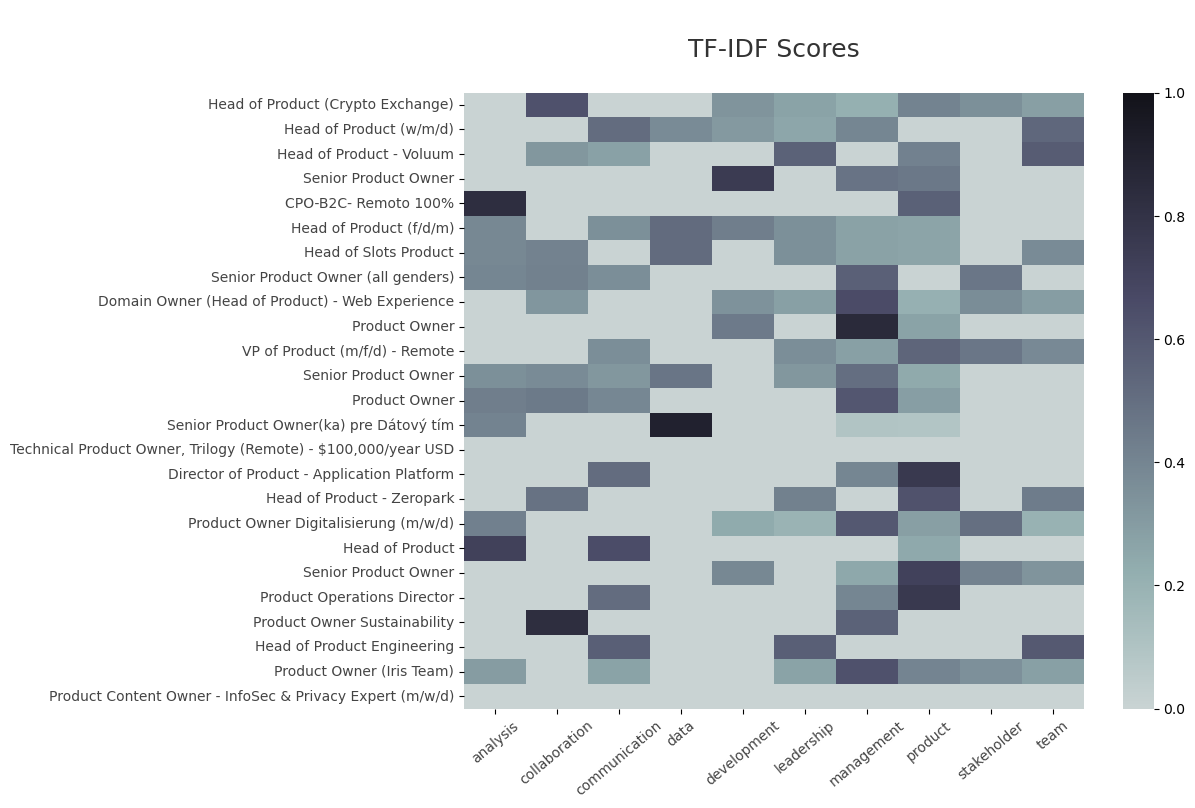

In [9]:
# Use the calculate_tfidf_scores function to get TF-IDF scores
tfidf_scores = calculate_tfidf_scores(df, text_column="skills_text", max_features=10)

# Get the job titles
job_titles = df["job_title"]

# Plot heatmap to visualize TF-IDF Scores
plt.figure(figsize=(10, 8))
plt.title("\nTF-IDF Scores\n", size=18, color="#333333")

# Define a customized color map for the heatmap
heatmap_cmap = adjust_colors(
    base_color="bone_r",
    n_colors=10,
    darkness_factor=[0.9] * 10,
    brightness_factor=[1.0] * 10,
)

# Create a heatmap using seaborn with TF-IDF scores
heatmap = sns.heatmap(
    tfidf_scores, cmap=heatmap_cmap, cbar=True, yticklabels=job_titles, vmin=0, vmax=1
)

# Adjust tick positions and labels for better readability
heatmap.set_xticks([i + 0.5 for i in range(10)])  # Set tick positions
heatmap.set_xticklabels(tfidf_scores.columns, rotation=40, ha="center", color="#444444")
heatmap.set_yticklabels(heatmap.get_yticklabels(), color="#444444")

plt.show()

### Decoding the Heatmap
In the heatmap, each rectangle represents a job listing (y-axis) and a keyword (x-axis). The color of each rectangle indicates the importance of the keyword within that specific job listing.

- **Color Scale:** The color scale represents the numerical range of TF-IDF scores for each keyword within job listings, with darker colors indicating higher TF-IDF scores (i.e. higher numbers).

- **Numbers on the Bar:** The numbers next to the color bar correspond directly to the color intensity and represent the actual TF-IDF scores, offering a quantitative scale for comparison.

#### Understanding TF-IDF Scores
The color intensity is determined by TF-IDF scores, which stands for Term Frequency-Inverse Document Frequency. Here's a simplified explanation:

- **Term Frequency (TF):** Measures how often a keyword appears in a specific job listing. The more frequent, the higher the TF.

- **Inverse Document Frequency (IDF):** Measures how unique a keyword is across all job listings. If a keyword is rare but present in a few job listings, it gets a higher IDF score.

- **TF-IDF Score:** Combines TF and IDF to assign a score to each keyword in each job listing, accounting for both frequency within the document and overall term distribution to indicate importance. Higher TF-IDF scores indicate more unique and impactful keywords for that specific job.

#### Interpreting Results
- **Dark Rectangle:** A dark rectangle means the keyword is essential and frequently mentioned in that job listing.

- **Comparing Rectangles:** Compare the darkness across different job listings for the same keyword. Darker rectangles suggest a consistent and strong relevance of the keyword across those jobs, helping to identify keywords relevant to multiple similar positions.

Use this information to identify keywords that are both frequent and unique in specific job listings, helping you tailor your resume to the specific requirements of different positions.

## Planning Your Next Career Moves

I hope our exploration of skills data has sparked fresh inspiration.

Which fields or abilities stood out the most in the visualizations of sought-after skills? How can you gain experience in promising new areas or build proficiency in highlighted competencies? Are there pathways that seem particularly well-aligned to advance your career?

Now is the time to set goals based on your takeaways. This can help translate questions into action. Consider incorporating those highlighted skills into your resume and updating your online presence. If you currently lack a particular skill, explore opportunities to build experience through projects, learning, or networking in industries of interest.

Aligning some potential next moves will ensure this analysis fuels tangible career progress. I'm confident that charting strategies based on your insights can steer and motivate your ongoing journey as it continues to unfold.

Thank you so much for participating!